### Import Packages

In [0]:
# If executing in Google Colab
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Run from here
import numpy as np
import pandas as pd

import csv 
import requests 
import xml.etree.ElementTree as ET 
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.text import Text

import numpy as np
import pandas as pd
import warnings
import nltk
import re
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.text import Text
import gensim
from tqdm import tqdm
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   

warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install pypyodbc

import pickle
temp = pickle.load(open("/content/drive/My Drive/New Data/data.pkl", 'rb'))

print("Necessary Imports Complete! ")

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
  Created wheel for pypyodbc: filename=pypyodbc-1.3.4-cp36-none-any.whl size=22843 sha256=f1be7ce20508025e4421687c37ca0788876f145d458a6e828db567567403208e
  Stored in directory: /root/.cache/pip/wheels/e4/92/18/b21aa15a7e8915859a6fc10206cdd7f5d9ac098a523b9738c6
Successfully built pypyodbc
Necessary Imports Complete! 


### Import data (Full Text)

In [0]:
import os
import pypyodbc

loc = '/content/drive/My Drive/New Data/Fulldocs-new'
os.chdir(loc)
filelist = os.listdir()
#print (len((pd.concat([pd.read_csv(item, names=[item[:-4]]) for item in filelist],axis=1))))

data = []
path = loc
files = [f for f in os.listdir(path) if os.path.isfile(f)]
for f in files:
    with open(f,'r') as myfile:
        data.append(myfile.read())
        
df = pd.DataFrame(data)
print (df.shape)

(50, 1)


### Text Cleaning for Word2Vec

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

#stopwrds = set(stopwords.words('english')) 
stopwrds = (stopwords.words('english')) 

def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^\.a-zA-Z]", " ", newString)  ### to modify to include full stops
    
    tokens = [w for w in newString.split() if not w in stopwrds]
    long_words=[]
    for i in tokens:
        if len(i)>=1:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

data_pickle_np = np.array(temp)

cleaned_full_sent = []
for t in tqdm(data_pickle_np[:4946,1]):
    cleaned_full_sent.append(text_cleaner(t))

cleaned_summ_sent = []
for t in tqdm(data_pickle_np[:4946,0]):
    cleaned_summ_sent.append(text_cleaner(t))

test_pickle_np = np.array(df)
test_sent = []
for t in tqdm(test_pickle_np[:50,0]):
    test_sent.append(text_cleaner(t))

100%|██████████| 50/50 [00:00<00:00, 87.75it/s]


In [0]:
# Sentence tokenization and tagging of document number t sentences

# temp = data_
set = len(cleaned_summ_sent)
# set = np.arange(0, 51, 1)
# set = [0, 1, 2]

full_sent = pd.DataFrame()
summ_sent = pd.DataFrame()

full_docs = []
summ_docs = []

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(set):
    full = cleaned_full_sent[i]
    summary = cleaned_summ_sent[i]

    v = sent_tokenize(full)    
    # t1 = pd.DataFrame(v)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t1 = pd.DataFrame(v1)


    v = sent_tokenize(summary)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t2 = pd.DataFrame(v1)

    t3 = np.linspace(i, i, num = len(t1))
    t4 = np.linspace(i, i, num = len(t2))

    full_docs = np.append(full_docs, t3)
    summ_docs = np.append(summ_docs, t4)

    full_sent = pd.concat([full_sent, t1], ignore_index = True)
    summ_sent = pd.concat([summ_sent, t2], ignore_index = True)
    # print(t1)
    print(i)
# -----------------------------------------------------------------------------------------------------------------------------

#print('summary sentence tokenization')
#print(len(summ_docs))
print(len(summ_sent))
#print(len(full_docs))
print(len(full_sent))

# summ_sent_mod = summ_sent.set_axis(['Sentences'], axis=1, inplace=False)
# full_sent_mod = full_sent.set_axis(['Sentences'], axis=1, inplace=False)

# -----------------------------------------------------------------------------------------------------------------------------

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
set = len(test_sent)
gs_sent = pd.DataFrame()
gs_docs = []

for i in range(set):
    test_s = test_sent[i]

    v = sent_tokenize(test_s)    
    # t1 = pd.DataFrame(v)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t1 = pd.DataFrame(v1)

    t3 = np.linspace(i, i, num = len(t1))

    gs_docs = np.append(gs_docs, t3)

    gs_sent = pd.concat([gs_sent, t1], ignore_index = True)
    
    # print(t1)
    #print(i)
# -----------------------------------------------------------------------------------------------------------------------------

#print('summary sentence tokenization')
#print(len(summ_docs))
print(len(gs_sent))


9092


In [0]:
print(len(summ_docs))
print(len(summ_sent))
print(len(full_docs))
print(len(full_sent))
print(len(gs_docs))
print(len(gs_sent))

138638
138638
642290
642290
9092
9092


In [0]:
combined = pd.DataFrame()

tmp1 = pd.DataFrame(summ_sent)
tmp1.columns = ['Sentences']

tmp2 = pd.DataFrame(full_sent)
tmp2.columns = ['Sentences']

tmp3 = pd.DataFrame(gs_sent)
tmp3.columns = ['Sentences']

combined = pd.concat([tmp1, tmp2], axis = 0, ignore_index=True, sort = False)
combined = pd.concat([combined, tmp3], axis = 0, ignore_index=True, sort = False)
combined.sample(10)

,Sentences
775143,stated p. statute passed purpose protecting pu...
214970,case mortgagors mortgaged agricultural lands p...
310275,appellate authority held appellant claim barre...
430381,learned counsel appellant mr. a.k.
376121,legislature could intended enacted s. b even i...
369404,copy said staff notice hereto annexed marked ex.
227310,contention survives whether impugned statute r...
744033,shaukat hussain respondent.
90248,punjab haryana high court v. state haryana ins...
6702,respondent contended appointing authority post...


In [0]:
tmp3['doc_id'] = gs_docs
tmp3.shape

(9092, 2)

In [0]:
tmp3.to_pickle("/content/drive/My Drive/Word2Vec_Modelling_Srijan/Data Produced/gs_sent.pickle")
# gs_docs.to_pickle("/content/drive/My Drive/Word2Vec_Modelling_Srijan/Data Produced/gs_doc.pickle")

In [0]:
tokenized_sentences = combined['Sentences'].apply(lambda x: x.split()) # tokenizing
print("\nColumn Tokenization Successful!")

# -----------------------------------------------------------------------------------------------------------------------------

n_size = 500

model_w2v = gensim.models.Word2Vec(
            tqdm(tokenized_sentences),
            size = n_size, # desired no. of features/independent variables 
            window = 5, # context window size
            min_count = 2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 7, # no.of cores
            seed = 34)

print("\nModel Training Started...")

model_w2v.train((tokenized_sentences), total_examples= len(tokenized_sentences), epochs=10)
print("\nModel Training Completed!")

# -----------------------------------------------------------------------------------------------------------------------------

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary   
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_sentences), n_size))
print("\nDataFrame Created!")

for i in range(len(tokenized_sentences)):
    wordvec_arrays[i,:] = word_vector(tokenized_sentences[i], n_size)
print("\nEmbeddings recorded!")
    
# -----------------------------------------------------------------------------------------------------------------------------

wordvec_df = pd.DataFrame(wordvec_arrays)
print("\nDataFrame Prepared")
print(wordvec_df.shape)
wordvec_df.to_pickle("/content/drive/My Drive/Word2Vec_Modelling_Srijan/Data Produced/word2vec_embeddings_" + str(n_size) + "_features.pickle")

# x2 = pd.DataFrame(wordvec_df)
# x2 = reduce_mem_usage(wordvec_df)

# import pickle
# x2.to_pickle("/content/drive/My Drive/Data/word2vec_embeddings_7000+_data_" + str(n_size) + "_features.pickle")

  3%|▎         | 26004/790020 [00:00<00:02, 260027.23it/s]


Column Tokenization Successful!


100%|██████████| 790020/790020 [00:03<00:00, 247832.84it/s]



Model Training Started...

Model Training Completed!

DataFrame Created!

Embeddings recorded!

DataFrame Prepared
(790020, 500)


In [0]:
n_size = 500

x2 = pd.read_pickle("/content/drive/My Drive/Word2Vec_Modelling_Srijan/Data Produced/word2vec_embeddings_" + str(n_size) + "_features.pickle")

In [0]:
x2 = pd.DataFrame(wordvec_df)

print(x2.shape)


summ_tfidf = x2.iloc[:len(summ_sent),:]
full_tfidf = x2.iloc[len(summ_sent):len(summ_sent)+len(full_sent),:]
gs_tfidf = x2.iloc[len(summ_sent)+len(full_sent):,:]

(790020, 500)


In [0]:
summ_tfidf['doc_id'] = summ_docs
full_tfidf['doc_id'] = full_docs
gs_tfidf['doc_id'] = gs_docs
summ_tfidf.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,doc_id
138633,0.052909,0.204310,-0.182033,-0.108339,0.058291,0.125222,0.056846,-0.017157,-0.067986,0.015457,0.097874,0.172377,-0.080724,-0.034096,-0.013370,-0.159421,0.247276,0.039295,-0.003231,-0.172390,-0.206623,0.006366,0.062763,-0.179488,0.072693,0.066641,0.033098,-0.101162,0.106090,-0.086952,-0.179408,-0.133605,0.319536,0.078669,-0.028551,0.077034,-0.158146,0.003883,0.014195,-0.043256,...,-0.098927,-0.165186,-0.186904,0.096432,-0.225175,-0.117801,-0.184696,0.070638,0.189515,-0.042394,-0.208857,-0.049354,0.138090,0.150784,0.177551,0.183441,0.157111,0.064732,0.052605,-0.164032,0.212487,-0.055967,-0.114701,0.242638,0.126709,-0.183886,-0.052915,0.080423,-0.153231,0.111761,-0.141023,-0.001422,0.036942,0.020847,-0.064377,-0.171835,-0.118999,0.054649,-0.086791,4945.0
138634,-0.002886,0.006412,-0.060822,0.017968,0.070417,-0.015906,-0.046709,0.066582,-0.221304,-0.045817,0.132945,0.134166,-0.024865,-0.056077,-0.008989,-0.036070,0.019683,-0.044228,0.006312,-0.279573,-0.116706,0.175847,0.028528,0.009335,-0.083788,0.063381,0.068819,-0.146644,0.023905,-0.081114,0.071247,-0.015331,0.216855,0.040284,-0.023097,0.068807,-0.043203,-0.047191,0.122393,0.000307,...,-0.217013,-0.066519,0.000197,-0.014059,-0.176165,-0.043572,-0.050466,0.020398,0.082116,0.074693,-0.024524,-0.022977,0.116218,-0.028777,0.087292,0.133900,0.069215,0.046648,-0.022559,-0.092796,0.139080,-0.017256,-0.140987,0.183083,0.056379,-0.092260,-0.115098,0.097661,-0.047151,0.049576,-0.112671,-0.013541,0.042561,0.061886,-0.053725,-0.126160,-0.002119,0.138500,-0.139266,4945.0
138635,0.016805,-0.045566,-0.148155,0.101187,0.107460,0.041026,-0.053644,0.134014,-0.109662,-0.061299,0.187543,0.131659,0.020727,-0.025860,-0.125731,-0.031773,0.101214,0.063133,0.022116,-0.214699,-0.131056,0.167081,-0.017399,-0.009356,-0.082545,0.103517,0.012731,-0.014460,-0.032475,-0.130089,0.051698,-0.007190,0.219907,0.081565,-0.020262,-0.004218,-0.053721,0.017574,0.082327,0.000100,...,-0.097088,-0.074425,-0.025364,-0.011623,-0.109226,0.037902,-0.028455,0.032948,0.151936,0.198261,-0.213489,-0.039119,0.137204,0.072093,0.019693,0.049932,0.001817,0.015073,0.083842,-0.087185,0.140652,0.021969,0.005992,0.071890,0.084225,-0.025316,-0.074630,0.032028,-0.006181,0.132663,0.009310,0.033751,0.011710,0.044092,-0.042001,-0.093964,-0.102589,0.141153,-0.059318,4945.0
138636,0.067053,-0.034428,-0.060770,-0.005826,0.030901,-0.086769,-0.099460,0.074245,-0.097346,0.001165,0.038265,0.095721,0.132115,0.001908,0.068888,-0.072786,0.092689,0.033125,0.039618,-0.192128,-0.061201,0.127905,-0.076048,-0.148962,-0.077307,0.055216,-0.043208,-0.012021,-0.049443,-0.010172,0.029518,-0.036805,0.268922,0.056959,-0.098435,0.055797,0.075657,0.006311,0.102954,-0.024085,...,-0.130602,-0.040123,0.066898,-0.037034,-0.100621,0.001731,0.053950,0.082835,0.145195,0.129517,-0.209965,-0.191267,0.018972,0.010114,0.026741,0.145509,0.135747,0.055612,0.096427,-0.076210,0.136484,-0.064953,-0.096417,0.122972,0.037268,0.008775,-0.124495,0.032373,-0.042205,0.018682,-0.062563,-0.021349,-0.062687,-0.007149,-0.045078,-0.159146,-0.045888,0.208062,-0.124367,4945.0
138637,0.138949,-0.026747,-0.057690,0.073309,-0.167787,-0.133581,-0.261838,-0.052223,-0.094207,-0.040423,-0.061790,0.000818,0.042380,0.201992,0.050721,0.114890,-0.006153,0.024722,-0.122900,-0.085373,-0.188849,0.174325,0.087642,-0.036372,-0.172404,-0.064714,-0.080806,-0.015358,0.115114,-0.109545,-0.208059,0.128706,0.087777,-0.038272,0.004768,0.012234,0.043977,0.022475,0.040453,0.095010,...,-0.169761,-0.035182,-0.088905,-0.043438,-0.417601,-0.107378,0.038475,0.179360,0.116286,0.048178,-0.057365,-0.097867,-0.002979,-0.152932,0.020053,0.014826,-0.012492,-0.009109,0.003539,0.004044,0.038583,-0.233058,-0.088632,0.096396,-0.014556,-0.043408,-0.13054

In [0]:
gs_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,doc_id
780928,0.038450,-0.014000,-0.079378,0.063210,0.079626,-0.179172,-0.130984,0.050493,-0.127533,0.005941,0.094512,0.187520,0.019079,0.021627,-0.039814,0.023310,0.173016,0.080301,0.044708,-0.124578,-0.039492,0.068364,0.085933,-0.079001,-0.124875,-0.047445,-0.028839,-0.006595,-0.062130,-0.167838,-0.016324,-0.069295,0.171154,-0.040275,-0.005343,0.132758,0.017280,-0.086750,0.146022,0.038600,...,-0.063367,-0.077720,-0.017267,0.022391,-0.146802,0.105456,-0.007604,0.224702,0.149369,0.081104,-0.289188,-0.114083,0.111992,-0.166954,0.069182,0.218126,0.089274,0.065015,0.001066,0.043389,0.108145,-0.134890,-0.112787,0.033733,0.008668,0.059316,-0.128192,-0.011857,-0.043568,0.166079,-0.047555,0.118337,0.043826,0.100823,-0.064740,-0.092142,-0.007153,0.181111,-0.092697,0.0
780929,0.062363,-0.001162,-0.026497,0.044985,-0.034897,-0.115223,-0.099230,0.099570,-0.120457,-0.027936,0.077066,0.140760,-0.066871,0.000327,0.051776,0.034436,0.060315,-0.052139,-0.038137,-0.102368,-0.079316,0.267545,-0.009331,-0.156219,-0.173800,0.075330,0.094240,0.063819,-0.021792,-0.200131,-0.006322,-0.040225,0.273311,0.067494,-0.089513,0.112143,0.021833,-0.045087,0.064398,0.152401,...,-0.047631,-0.007456,-0.024026,0.081930,-0.137316,0.171391,-0.013232,0.219938,0.124353,0.123171,-0.153783,-0.169755,0.071784,-0.060608,0.000047,0.245975,0.134639,0.086216,-0.021593,-0.071256,0.140478,-0.061424,-0.083788,0.069569,0.014470,0.093253,-0.199369,0.018218,-0.017223,0.199371,0.080445,0.093845,-0.012622,0.073555,-0.022715,-0.130756,-0.025802,0.069829,-0.037739,0.0
780930,0.111231,0.037524,-0.079701,0.002043,0.108326,-0.090481,-0.210311,0.022939,-0.149999,0.035856,0.041790,0.169826,-0.009845,0.009021,-0.002049,0.053791,-0.006065,0.161976,-0.131936,-0.087579,-0.040917,0.174588,0.072396,0.010386,-0.230213,-0.086071,-0.093680,-0.104703,0.065390,-0.205450,-0.001097,0.071082,0.189670,0.015350,-0.024547,0.045206,-0.022415,-0.012159,0.216607,0.146945,...,0.026236,-0.086081,0.123957,0.044911,-0.166773,-0.041008,-0.045365,0.230151,0.256434,0.071440,-0.277106,-0.087811,0.093520,-0.188520,0.097655,0.125510,0.030595,0.123858,0.068369,-0.017209,0.142488,-0.102840,-0.070479,0.124930,0.020566,0.001261,-0.115428,0.017474,-0.076561,0.000937,0.054126,0.058201,0.029010,0.069397,-0.119780,-0.069982,0.005326,0.182445,-0.171566,0.0
780931,-0.059699,0.028605,-0.087831,-0.044717,0.018448,-0.142013,-0.087741,0.141145,-0.076395,0.065869,0.139229,0.008639,0.058849,0.046352,0.001024,-0.012357,0.047940,0.031952,-0.028205,-0.078497,-0.097632,0.173063,0.004025,-0.080926,-0.073371,-0.013162,0.016268,0.013115,-0.078763,-0.108032,-0.031918,-0.011391,0.254035,0.008526,-0.062253,0.039087,0.011092,0.004894,0.058987,0.174194,...,-0.017453,-0.087045,0.072960,0.083116,-0.051020,-0.003403,-0.018989,0.116574,0.113862,0.058704,-0.330409,-0.007570,0.119374,-0.063925,0.094595,0.060244,0.073890,0.073163,0.055632,0.021419,0.098075,-0.150276,-0.171253,0.174100,0.035457,-0.058031,-0.233643,0.045459,-0.006228,0.234889,-0.010570,0.035244,0.087233,0.029904,-0.103039,-0.067545,0.124887,0.198884,-0.028637,0.0
780932,0.052225,0.009685,0.124071,0.072321,0.185451,-0.008387,-0.079136,-0.031190,-0.055838,-0.024212,0.181280,0.172630,-0.001032,-0.028664,0.226673,0.052200,0.058032,-0.055049,0.138561,-0.061036,0.071283,0.138881,0.181471,-0.113045,-0.187943,0.045524,-0.097956,-0.203675,0.021522,-0.308487,0.096113,-0.085029,0.229388,0.227152,0.151390,0.137654,0.053825,0.074730,0.237356,0.243022,...,-0.058796,-0.128040,0.029268,0.164457,-0.063358,0.009364,0.000515,0.186923,0.128476,-0.047498,-0.016576,-0.024474,0.125819,-0.133832,0.071453,0.230272,-0.114858,0.220886,-0.056069,-0.259074,0.148302,-0.006340,-0.115084,-0.020267,0.013668,-0.173678,-0.062768,0.118295,-0.043564,0.181980

In [0]:
from sklearn import preprocessing

# -----------------------------------------------------------------------------------------------------------------------------

summ_tfidf_normalized = preprocessing.normalize(summ_tfidf.drop(['doc_id'], axis=1), norm='l2')
summ_tfidf_normalized = pd.DataFrame(summ_tfidf_normalized)
summ_tfidf_normalized.columns = summ_tfidf.drop(['doc_id'], axis=1).columns
summ_tfidf_normalized['doc_id'] = np.array(summ_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------

full_tfidf_normalized = preprocessing.normalize(full_tfidf.drop(['doc_id'], axis=1), norm='l2')
full_tfidf_normalized = pd.DataFrame(full_tfidf_normalized)
full_tfidf_normalized.columns = full_tfidf.drop(['doc_id'], axis=1).columns
full_tfidf_normalized['doc_id'] = np.array(full_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------
gs_tfidf_normalized = preprocessing.normalize(gs_tfidf.drop(['doc_id'], axis=1), norm='l2')
gs_tfidf_normalized = pd.DataFrame(gs_tfidf_normalized)
gs_tfidf_normalized.columns = gs_tfidf.drop(['doc_id'], axis=1).columns
gs_tfidf_normalized['doc_id'] = np.array(gs_tfidf.doc_id)



gs_tfidf_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,doc_id
0,0.017849,-0.006499,-0.036847,0.029342,0.036962,-0.083171,-0.060803,0.023439,-0.059200,0.002758,0.043872,0.087046,0.008856,0.010039,-0.018481,0.010820,0.080314,0.037275,0.020754,-0.057829,-0.018332,0.031734,0.039890,-0.036672,-0.057966,-0.022024,-0.013387,-0.003061,-0.028840,-0.077910,-0.007577,-0.032167,0.079449,-0.018695,-0.002480,0.061626,0.008021,-0.040269,0.067783,0.017918,...,-0.029415,-0.036078,-0.008015,0.010394,-0.068145,0.048952,-0.003530,0.104306,0.069336,0.037648,-0.134240,-0.052957,0.051986,-0.077500,0.032114,0.101254,0.041441,0.030180,0.000495,0.020141,0.050201,-0.062616,-0.052355,0.015659,0.004023,0.027535,-0.059506,-0.005504,-0.020224,0.077093,-0.022075,0.054931,0.020344,0.046802,-0.030052,-0.042772,-0.003320,0.084071,-0.043030,0.0
1,0.028313,-0.000528,-0.012030,0.020424,-0.015844,-0.052313,-0.045052,0.045206,-0.054689,-0.012683,0.034989,0.063907,-0.030360,0.000149,0.023507,0.015634,0.027384,-0.023672,-0.017315,-0.046476,-0.036010,0.121469,-0.004236,-0.070925,-0.078907,0.034201,0.042786,0.028975,-0.009894,-0.090862,-0.002870,-0.018263,0.124086,0.030643,-0.040640,0.050914,0.009912,-0.020470,0.029238,0.069192,...,-0.021625,-0.003385,-0.010908,0.037197,-0.062343,0.077814,-0.006008,0.099855,0.056458,0.055921,-0.069820,-0.077071,0.032591,-0.027517,0.000021,0.111676,0.061128,0.039143,-0.009804,-0.032351,0.063779,-0.027887,-0.038041,0.031585,0.006569,0.042338,-0.090516,0.008271,-0.007819,0.090517,0.036523,0.042607,-0.005731,0.033395,-0.010313,-0.059365,-0.011714,0.031703,-0.017134,0.0
2,0.049539,0.016712,-0.035497,0.000910,0.048245,-0.040298,-0.093666,0.010216,-0.066805,0.015969,0.018612,0.075636,-0.004385,0.004018,-0.000913,0.023957,-0.002701,0.072140,-0.058760,-0.039005,-0.018223,0.077756,0.032243,0.004626,-0.102530,-0.038334,-0.041722,-0.046632,0.029123,-0.091502,-0.000489,0.031658,0.084474,0.006836,-0.010933,0.020133,-0.009983,-0.005415,0.096470,0.065445,...,0.011685,-0.038338,0.055207,0.020002,-0.074276,-0.018264,-0.020204,0.102502,0.114208,0.031817,-0.123415,-0.039108,0.041651,-0.083961,0.043492,0.055898,0.013626,0.055163,0.030449,-0.007664,0.063460,-0.045802,-0.031389,0.055640,0.009160,0.000561,-0.051408,0.007782,-0.034098,0.000417,0.024106,0.025921,0.012920,0.030907,-0.053346,-0.031168,0.002372,0.081256,-0.076410,0.0
3,-0.027535,0.013193,-0.040510,-0.020624,0.008509,-0.065500,-0.040468,0.065100,-0.035235,0.030380,0.064216,0.003984,0.027143,0.021379,0.000472,-0.005699,0.022111,0.014737,-0.013009,-0.036205,-0.045030,0.079821,0.001856,-0.037325,-0.033841,-0.006071,0.007503,0.006049,-0.036328,-0.049827,-0.014721,-0.005254,0.117168,0.003932,-0.028713,0.018028,0.005116,0.002257,0.027206,0.080343,...,-0.008050,-0.040148,0.033651,0.038335,-0.023532,-0.001570,-0.008758,0.053767,0.052516,0.027076,-0.152393,-0.003492,0.055058,-0.029484,0.043630,0.027786,0.034080,0.033745,0.025659,0.009879,0.045235,-0.069311,-0.078986,0.080300,0.016354,-0.026765,-0.107762,0.020967,-0.002872,0.108337,-0.004875,0.016256,0.040234,0.013792,-0.047524,-0.031153,0.057601,0.091730,-0.013208,0.0
4,0.018542,0.003439,0.044051,0.025678,0.065844,-0.002978,-0.028097,-0.011074,-0.019825,-0.008597,0.064363,0.061292,-0.000366,-0.010177,0.080480,0.018534,0.020604,-0.019545,0.049196,-0.021671,0.025309,0.049310,0.064431,-0.040136,-0.066729,0.016163,-0.034779,-0.072314,0.007642,-0.109528,0.034125,-0.030189,0.081444,0.080650,0.053751,0.048874,0.019110,0.026533,0.084273,0.086285,...,-0.020875,-0.045460,0.010392,0.058390,-0.022495,0.003325,0.000183,0.066367,0.045615,-0.016864,-0.005885,-0.008689,0.044672,-0.047517,0.025369,0.081758,-0.040780,0.078425,-0.019907,-0.091984,0.052654,-0.002251,-0.040861,-0.007196,0.004853,-0.061664,-0.022286,0.042001,-0.015468,0.064612,0.009520,0.010446,0.0606

In [0]:
cosine_vec = []

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(0,4946):
  tmp_full_sent = summ_tfidf_normalized[summ_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)
  tmp_summ_sent = full_tfidf_normalized[full_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)

  M = tmp_summ_sent.dot(np.transpose(tmp_full_sent))
  cos_doc = (np.amax(M, axis = 1))
  cosine_vec = np.append(cosine_vec, cos_doc)

# -----------------------------------------------------------------------------------------------------------------------------

len(cosine_vec)

642290

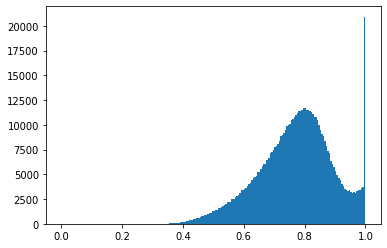

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------------------------------------------------------

plt.hist(cosine_vec, bins=200)
plt.show()

In [0]:
imp = np.copy(cosine_vec)

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(len(imp)):
  if(imp[i]>=0.85):
    imp[i] = 1
  else:
    imp[i] = 0

# -----------------------------------------------------------------------------------------------------------------------------

full_tfidf_normalized['importance'] = imp
full_tfidf_normalized['importance'].value_counts()

0.0    474108
1.0    168182
Name: importance, dtype: int64

In [0]:
full_tfidf_normalized.to_pickle("/content/drive/My Drive/Word2Vec_Modelling_Srijan/Data Produced/word2vec_result_final_"+ str(500) +".pickle")
gs_tfidf_normalized.to_pickle("/content/drive/My Drive/Word2Vec_Modelling_Srijan/Data Produced/gs_result_final_"+ str(500) +".pickle")

In [0]:
print(cosv[cosv.cosine>=0.5].count()/cosv.shape[0])

cosine    0.146124
dtype: float64


In [0]:
cosv['Response'] = [1 if x >=0.5 else 0 for x in cosv['cosine']]

In [0]:
full_tfidf_normalized_write=full_tfidf_normalized.drop(['doc_id'], axis=1)
vocab_train_1 = pd.concat([full_tfidf_normalized_write, cosv['Response']], axis = 1, ignore_index=True, sort = False)

In [0]:
vocab_train_1.to_pickle("/content/drive/My Drive/New Data/vocab_train.pkl")

In [0]:
vocab_train_1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
613885,0.014769,-0.000492,0.008167,0.006659,-0.001936,-0.000359,0.005424,-0.003553,0.010137,0.003207,0.011838,0.007459,0.009915,-0.011115,0.000525,-0.006043,0.006380,-0.000973,0.004012,0.004242,0.003992,0.009264,-0.007321,0.016512,0.000705,-0.007354,0.008919,0.004740,-0.000722,0.010945,0.009903,-0.013727,0.018370,-0.002019,-0.005827,0.002341,-0.005356,-0.011937,0.010210,-0.006146,...,0.002372,-0.004555,-0.001456,-0.003725,-0.005024,0.001553,-0.001322,-0.001390,-0.000892,-0.004592,-0.011456,-0.005206,-0.006963,-0.001679,-0.001018,-0.002310,0.004934,-0.003371,0.000104,0.004604,0.000840,0.004434,-0.005564,-0.005372,0.006698,-0.006917,0.000371,-0.002666,-0.000411,-0.003848,-0.002929,-0.001293,0.005581,-0.003187,-0.003185,0.001172,0.005096,-0.005704,0.001992,0
613886,0.243952,-0.143189,-0.057538,0.026089,0.006166,-0.002020,0.006785,-0.020475,0.367784,-0.059344,-0.128438,-0.037698,0.001526,-0.003646,-0.020099,0.027855,-0.013878,-0.003132,-0.024064,-0.004174,-0.050335,0.002463,-0.020210,-0.015403,-0.014038,0.006281,-0.001640,-0.003898,-0.002705,-0.009850,-0.006467,-0.002679,0.004714,0.002354,-0.014960,0.003013,-0.004317,-0.011746,-0.004636,-0.004416,...,0.061569,-0.152726,0.062541,-0.003381,-0.013536,0.013469,0.006857,-0.015748,0.052781,0.104738,-0.039977,-0.092407,-0.061223,0.309002,-0.132729,0.078850,0.100753,0.002606,-0.148243,0.196984,0.143540,-0.037121,-0.029289,-0.096484,-0.066722,0.001359,-0.029651,0.069466,0.005175,0.077606,-0.019661,-0.015286,0.072922,0.016100,-0.007564,-0.021022,-0.005414,-0.006775,-0.047932,0
613887,0.108941,-0.006058,0.134698,0.123202,0.349717,-0.101183,-0.007647,-0.011614,-0.045946,-0.000600,-0.015205,0.002484,-0.003832,-0.017464,-0.002215,-0.016307,-0.013083,-0.017334,-0.003521,0.007941,-0.016980,0.021641,-0.023352,0.073243,0.014945,-0.015943,0.004910,0.003376,0.010874,0.035375,0.018057,-0.024220,0.007750,-0.040003,0.020321,-0.000729,0.005325,-0.028688,0.004456,-0.030543,...,0.000817,-0.005220,-0.008570,-0.004381,-0.000584,-0.001502,-0.001757,-0.001680,-0.004595,-0.006766,-0.010185,-0.003207,-0.004710,-0.000960,-0.001116,-0.000366,0.003701,-0.005146,-0.001512,-0.000105,0.005553,0.004606,-0.008564,-0.001008,0.007521,-0.001418,-0.000445,-0.004943,0.000104,-0.004928,-0.003034,-0.005795,0.001161,-0.004182,0.003345,-0.004524,0.002193,-0.002409,-0.002620,0
613888,0.118144,-0.013113,0.156017,0.137626,0.435580,-0.131435,-0.021687,-0.000735,-0.079702,0.004582,-0.037271,-0.018345,0.001146,-0.023610,-0.008852,-0.016091,-0.019692,-0.021114,-0.011088,-0.004694,-0.011870,0.018064,-0.004907,0.012228,-0.000476,-0.011232,0.002095,-0.011310,-0.005779,0.007711,0.002703,-0.007925,0.014142,0.004903,-0.007934,-0.001392,-0.003361,-0.010182,0.006055,-0.012136,...,0.002715,-0.003530,-0.002037,-0.004819,-0.002591,0.002362,-0.003271,0.000597,-0.002596,-0.007075,-0.016547,0.007424,-0.002693,-0.002947,-0.003080,0.001650,0.004582,-0.004440,-0.004408,-0.000462,0.003403,-0.004151,-0.002345,-0.002042,0.011726,-0.006085,-0.000613,0.001988,0.003450,-0.003454,0.002110,-0.006318,0.002654,0.012458,0.000908,0.000619,-0.000661,-0.000854,0.000882,0
613889,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000

In [0]:
vocab_train_1[200].head()

0    0
1    0
2    0
3    0
4    0
Name: 200, dtype: int64